In [150]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccdgemm,0,16,1,1,2022-04-20T13:51:44Z,2022-04-20T13:51:47Z,2022-04-20T14:11:36Z,2022-04-20T14:11:36Z,20m24.715358013s,30.3262
1,hpccdgemm,1,16,1,1,2022-04-20T13:52:44Z,2022-04-20T13:52:47Z,2022-04-20T14:12:19Z,2022-04-20T14:12:19Z,20m12.565999074s,30.7806
2,hpccdgemm,2,16,1,1,2022-04-20T13:53:44Z,2022-04-20T13:53:48Z,2022-04-20T14:14:04Z,2022-04-20T14:14:04Z,20m52.658892313s,29.5568
3,hpccdgemm,3,16,1,1,2022-04-20T13:54:44Z,2022-04-20T13:54:49Z,2022-04-20T14:14:37Z,2022-04-20T14:14:37Z,20m32.53954356s,30.2330
4,hpccdgemm,4,16,1,1,2022-04-20T13:55:45Z,2022-04-20T13:55:48Z,2022-04-20T14:14:51Z,2022-04-20T14:14:51Z,19m41.542812897s,31.5280
5,hpccdgemm,5,16,1,1,2022-04-20T13:56:45Z,2022-04-20T13:56:48Z,2022-04-20T14:16:38Z,2022-04-20T14:16:38Z,20m31.567679504s,32.3108
6,hpccdgemm,6,16,1,1,2022-04-20T13:57:45Z,2022-04-20T13:57:49Z,2022-04-20T14:17:15Z,2022-04-20T14:17:15Z,20m11.563087781s,30.9465
7,hpccdgemm,7,16,1,1,2022-04-20T13:58:45Z,2022-04-20T13:58:48Z,2022-04-20T14:18:16Z,2022-04-20T14:18:16Z,20m11.561808949s,30.6656
8,hpccdgemm,8,16,1,1,2022-04-20T13:59:45Z,2022-04-20T14:12:10Z,2022-04-20T14:31:56Z,2022-04-20T14:31:56Z,32m43.894224764s,31.2530
9,hpccdgemm,9,16,1,1,2022-04-20T14:00:45Z,2022-04-20T14:12:59Z,2022-04-20T14:32:46Z,2022-04-20T14:32:46Z,32m41.567151116s,31.1707


In [151]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [152]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [153]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccdgemm,0,16,1,1,2022-04-20 13:51:44+00:00,2022-04-20 13:51:47+00:00,2022-04-20 14:11:36+00:00,2022-04-20 14:11:36+00:00,0 days 00:20:24.715358013,30.3262,0 days 00:00:03,0 days 00:19:49,0 days
1,hpccdgemm,1,16,1,1,2022-04-20 13:52:44+00:00,2022-04-20 13:52:47+00:00,2022-04-20 14:12:19+00:00,2022-04-20 14:12:19+00:00,0 days 00:20:12.565999074,30.7806,0 days 00:00:03,0 days 00:19:32,0 days
2,hpccdgemm,2,16,1,1,2022-04-20 13:53:44+00:00,2022-04-20 13:53:48+00:00,2022-04-20 14:14:04+00:00,2022-04-20 14:14:04+00:00,0 days 00:20:52.658892313,29.5568,0 days 00:00:04,0 days 00:20:16,0 days
3,hpccdgemm,3,16,1,1,2022-04-20 13:54:44+00:00,2022-04-20 13:54:49+00:00,2022-04-20 14:14:37+00:00,2022-04-20 14:14:37+00:00,0 days 00:20:32.539543560,30.2330,0 days 00:00:05,0 days 00:19:48,0 days
4,hpccdgemm,4,16,1,1,2022-04-20 13:55:45+00:00,2022-04-20 13:55:48+00:00,2022-04-20 14:14:51+00:00,2022-04-20 14:14:51+00:00,0 days 00:19:41.542812897,31.5280,0 days 00:00:03,0 days 00:19:03,0 days
5,hpccdgemm,5,16,1,1,2022-04-20 13:56:45+00:00,2022-04-20 13:56:48+00:00,2022-04-20 14:16:38+00:00,2022-04-20 14:16:38+00:00,0 days 00:20:31.567679504,32.3108,0 days 00:00:03,0 days 00:19:50,0 days
6,hpccdgemm,6,16,1,1,2022-04-20 13:57:45+00:00,2022-04-20 13:57:49+00:00,2022-04-20 14:17:15+00:00,2022-04-20 14:17:15+00:00,0 days 00:20:11.563087781,30.9465,0 days 00:00:04,0 days 00:19:26,0 days
7,hpccdgemm,7,16,1,1,2022-04-20 13:58:45+00:00,2022-04-20 13:58:48+00:00,2022-04-20 14:18:16+00:00,2022-04-20 14:18:16+00:00,0 days 00:20:11.561808949,30.6656,0 days 00:00:03,0 days 00:19:28,0 days
8,hpccdgemm,8,16,1,1,2022-04-20 13:59:45+00:00,2022-04-20 14:12:10+00:00,2022-04-20 14:31:56+00:00,2022-04-20 14:31:56+00:00,0 days 00:32:43.894224764,31.2530,0 days 00:12:25,0 days 00:19:46,0 days
9,hpccdgemm,9,16,1,1,2022-04-20 14:00:45+00:00,2022-04-20 14:12:59+00:00,2022-04-20 14:32:46+00:00,2022-04-20 14:32:46+00:00,0 days 00:32:41.567151116,31.1707,0 days 00:12:14,0 days 00:19:47,0 days


In [154]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [155]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,1,1,2022-04-20 13:51:44+00:00,2022-04-20 13:51:47+00:00,2022-04-20 14:11:36+00:00,2022-04-20 14:11:36+00:00,0 days 00:20:24.715358013,30.3262,0 days 00:00:03,0 days 00:19:49,0 days,2022-04-20 13:51:44+00:00,0 days 00:00:00
1,hpccdgemm,1,16,1,1,2022-04-20 13:52:44+00:00,2022-04-20 13:52:47+00:00,2022-04-20 14:12:19+00:00,2022-04-20 14:12:19+00:00,0 days 00:20:12.565999074,30.7806,0 days 00:00:03,0 days 00:19:32,0 days,2022-04-20 13:51:44+00:00,0 days 00:01:00
2,hpccdgemm,2,16,1,1,2022-04-20 13:53:44+00:00,2022-04-20 13:53:48+00:00,2022-04-20 14:14:04+00:00,2022-04-20 14:14:04+00:00,0 days 00:20:52.658892313,29.5568,0 days 00:00:04,0 days 00:20:16,0 days,2022-04-20 13:51:44+00:00,0 days 00:02:00
3,hpccdgemm,3,16,1,1,2022-04-20 13:54:44+00:00,2022-04-20 13:54:49+00:00,2022-04-20 14:14:37+00:00,2022-04-20 14:14:37+00:00,0 days 00:20:32.539543560,30.2330,0 days 00:00:05,0 days 00:19:48,0 days,2022-04-20 13:51:44+00:00,0 days 00:03:00
4,hpccdgemm,4,16,1,1,2022-04-20 13:55:45+00:00,2022-04-20 13:55:48+00:00,2022-04-20 14:14:51+00:00,2022-04-20 14:14:51+00:00,0 days 00:19:41.542812897,31.5280,0 days 00:00:03,0 days 00:19:03,0 days,2022-04-20 13:51:44+00:00,0 days 00:04:01
5,hpccdgemm,5,16,1,1,2022-04-20 13:56:45+00:00,2022-04-20 13:56:48+00:00,2022-04-20 14:16:38+00:00,2022-04-20 14:16:38+00:00,0 days 00:20:31.567679504,32.3108,0 days 00:00:03,0 days 00:19:50,0 days,2022-04-20 13:51:44+00:00,0 days 00:05:01
6,hpccdgemm,6,16,1,1,2022-04-20 13:57:45+00:00,2022-04-20 13:57:49+00:00,2022-04-20 14:17:15+00:00,2022-04-20 14:17:15+00:00,0 days 00:20:11.563087781,30.9465,0 days 00:00:04,0 days 00:19:26,0 days,2022-04-20 13:51:44+00:00,0 days 00:06:01
7,hpccdgemm,7,16,1,1,2022-04-20 13:58:45+00:00,2022-04-20 13:58:48+00:00,2022-04-20 14:18:16+00:00,2022-04-20 14:18:16+00:00,0 days 00:20:11.561808949,30.6656,0 days 00:00:03,0 days 00:19:28,0 days,2022-04-20 13:51:44+00:00,0 days 00:07:01
8,hpccdgemm,8,16,1,1,2022-04-20 13:59:45+00:00,2022-04-20 14:12:10+00:00,2022-04-20 14:31:56+00:00,2022-04-20 14:31:56+00:00,0 days 00:32:43.894224764,31.2530,0 days 00:12:25,0 days 00:19:46,0 days,2022-04-20 13:51:44+00:00,0 days 00:08:01
9,hpccdgemm,9,16,1,1,2022-04-20 14:00:45+00:00,2022-04-20 14:12:59+00:00,2022-04-20 14:32:46+00:00,2022-04-20 14:32:46+00:00,0 days 00:32:41.567151116,31.1707,0 days 00:12:14,0 days 00:19:47,0 days,2022-04-20 13:51:44+00:00,0 days 00:09:01


In [156]:
df['benchmark'].unique()

array(['hpccdgemm'], dtype=object)

In [157]:
df['nWorkers'].unique()

array([1])

#  performance

In [158]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [159]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccdgemm,16,1,1,30.87712,0.722985


   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       1         1         30.87712        0.722985


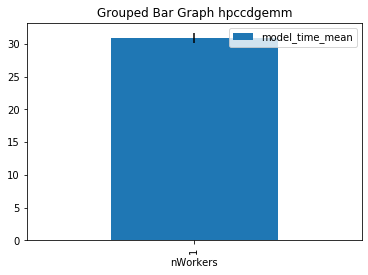

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [161]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run'].dt.total_seconds()),
                  'run_std' : std(x['run'].dt.total_seconds()),
                'final_mean' : mean(x['final'].dt.total_seconds()),
                  'final_std' : std(x['final'].dt.total_seconds()),
                'duration_mean' : mean(x['duration'].dt.total_seconds()),
                  'duration_std' : std(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [162]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccdgemm,16,1,1,0 days 00:02:30.700000,0 days 00:04:54.410954279,1180.5,18.429596,0.0,0.0,1368.417656,297.670782


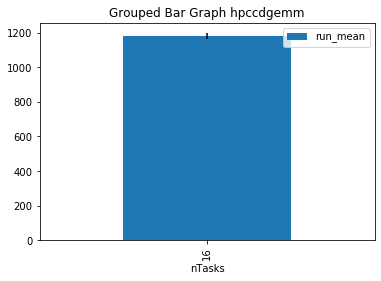

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['run_mean'] = df_bench['run_mean']
    df_bench['run_std'] = df_bench['run_std']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='run_mean',
                  yerr='run_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [164]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time1 = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time1.append(df_senario)

In [165]:
df_time1 = pd.concat(df_time1, axis=0)
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccdgemm,16,1507.0,11805.0,0.0,13684.176558


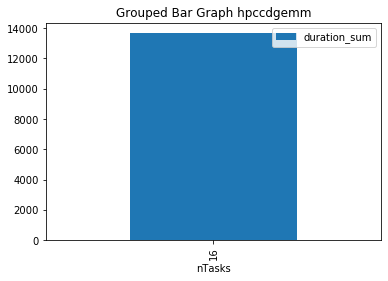

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time1['benchmark'].unique():
    df_bench = df_time1[(df_time1['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

## save file


In [167]:
df_performance['scenario']="cpumem-granularity-notg"
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std,scenario
0,hpccdgemm,16,1,1,30.87712,0.722985,cpumem-granularity-notg


In [169]:
df_time['scenario']="none"
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std,scenario
0,hpccdgemm,16,1,1,0 days 00:02:30.700000,0 days 00:04:54.410954279,1180.5,18.429596,0.0,0.0,1368.417656,297.670782,none


In [69]:
df_time1['scenario']="cpumem-granularity-notg"
df_time1

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum,scenario
0,hpccdgemm,16,1274.0,10198.0,1.0,11877.470054,cpumem-granularity-notg


In [170]:
# df_performance.to_csv('performance.csv', mode='a', header=False, index=False)
df_time.to_csv('time.csv', mode='a', header=False, index=False)
# df_time1.to_csv('timesum.csv', mode='a', header=False, index=False) 

In [71]:
# df_performance.to_csv('performance.csv', index=False)
df_time.to_csv('time.csv', index=False)
# df_time1.to_csv('timesum.csv', index=False)

# Graph

In [39]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,4,4,2022-04-21 13:56:36+00:00,2022-04-21 13:56:40+00:00,2022-04-21 14:15:21+00:00,2022-04-21 14:15:21+00:00,0 days 00:19:17.253042739,33.3969,0 days 00:00:04,0 days 00:18:41,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:00:00
1,hpccdgemm,1,16,4,4,2022-04-21 13:57:36+00:00,2022-04-21 13:57:41+00:00,2022-04-21 14:16:29+00:00,2022-04-21 14:16:29+00:00,0 days 00:19:30.557017378,33.0297,0 days 00:00:05,0 days 00:18:48,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:01:00
2,hpccdgemm,2,16,4,4,2022-04-21 13:58:36+00:00,2022-04-21 13:58:40+00:00,2022-04-21 14:16:57+00:00,2022-04-21 14:16:57+00:00,0 days 00:19:00.554758914,33.4245,0 days 00:00:04,0 days 00:18:17,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:02:00
3,hpccdgemm,3,16,4,4,2022-04-21 13:59:37+00:00,2022-04-21 13:59:41+00:00,2022-04-21 14:18:07+00:00,2022-04-21 14:18:07+00:00,0 days 00:19:10.554090010,33.4530,0 days 00:00:04,0 days 00:18:26,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:03:01
4,hpccdgemm,4,16,4,4,2022-04-21 14:00:37+00:00,2022-04-21 14:00:41+00:00,2022-04-21 14:19:01+00:00,2022-04-21 14:19:01+00:00,0 days 00:18:59.558601266,33.7287,0 days 00:00:04,0 days 00:18:20,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:04:01
5,hpccdgemm,5,16,4,4,2022-04-21 14:01:37+00:00,2022-04-21 14:01:42+00:00,2022-04-21 14:19:59+00:00,2022-04-21 14:19:59+00:00,0 days 00:18:59.551472633,33.9336,0 days 00:00:05,0 days 00:18:17,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:05:01
6,hpccdgemm,6,16,4,4,2022-04-21 14:02:37+00:00,2022-04-21 14:02:42+00:00,2022-04-21 14:20:22+00:00,2022-04-21 14:20:23+00:00,0 days 00:18:18.342013108,34.1442,0 days 00:00:05,0 days 00:17:40,0 days 00:00:01,2022-04-21 13:56:36+00:00,0 days 00:06:01
7,hpccdgemm,7,16,4,4,2022-04-21 14:03:37+00:00,2022-04-21 14:03:41+00:00,2022-04-21 14:21:30+00:00,2022-04-21 14:21:30+00:00,0 days 00:18:29.553977177,34.1878,0 days 00:00:04,0 days 00:17:49,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:07:01
8,hpccdgemm,8,16,4,4,2022-04-21 14:04:37+00:00,2022-04-21 14:15:56+00:00,2022-04-21 14:36:57+00:00,2022-04-21 14:36:57+00:00,0 days 00:32:59.553828756,32.0195,0 days 00:11:19,0 days 00:21:01,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:08:01
9,hpccdgemm,9,16,4,4,2022-04-21 14:05:38+00:00,2022-04-21 14:17:09+00:00,2022-04-21 14:38:15+00:00,2022-04-21 14:38:15+00:00,0 days 00:33:18.560056676,31.2652,0 days 00:11:31,0 days 00:21:06,0 days 00:00:00,2022-04-21 13:56:36+00:00,0 days 00:09:02


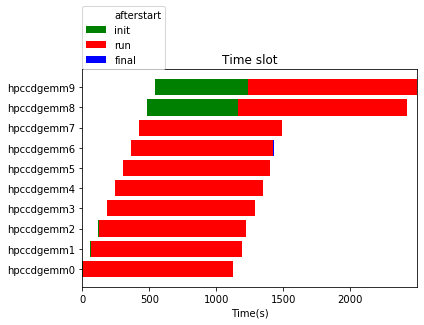

In [40]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
